### Questions about the dataset:
1. What is the number of tracks in each gener, and how popularity each genre is?
2. What is the mean tracks duration of each genre?
3. Does the track's duration can indicates it's popularity?
4. what is the correlation between different features? does one can indicates the other?

##### Machine learning question- can a model predict the popularity of the track by its other features?

In [149]:
import numpy as np
import pandas as pd
from collections import Counter

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import random

from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.utils import shuffle
from sklearn.dummy import DummyClassifier

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('always')

In [47]:
spotify_data = pd.read_csv(r'SpotifyFeatures.csv')

In [48]:
spotify_data.head()

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


### Data Cleaning

In [49]:
# no null values
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232725 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

In [50]:
spotify_data.isnull().sum()

genre               0
artist_name         0
track_name          0
track_id            0
popularity          0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
dtype: int64

In [51]:
# duplicate values

duplicate_rows = spotify_data[spotify_data.duplicated(subset='track_id')]
print("There are {} duplicae values".format(len(duplicate_rows)))

There are 55951 duplicae values


In [52]:
# Looking at one of the tracks which has duplicate valuees, there are 5 (!) different rows for the same track! 

spotify_data[spotify_data['track_id'] == duplicate_rows.iloc[0]['track_id']]

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
257,R&B,Doja Cat,Go To Town,6iOvnACn4ChlAw4lWUU4dd,64,0.0716,0.71,217813,0.71,0.000001,C,0.206,-2.474,Major,0.0579,169.944,4/4,0.7
1348,Alternative,Doja Cat,Go To Town,6iOvnACn4ChlAw4lWUU4dd,64,0.0716,0.71,217813,0.71,0.000001,C,0.206,-2.474,Major,0.0579,169.944,4/4,0.7
77710,Children’s Music,Doja Cat,Go To Town,6iOvnACn4ChlAw4lWUU4dd,64,0.0716,0.71,217813,0.71,0.000001,C,0.206,-2.474,Major,0.0579,169.944,4/4,0.7
93651,Indie,Doja Cat,Go To Town,6iOvnACn4ChlAw4lWUU4dd,64,0.0716,0.71,217813,0.71,0.000001,C,0.206,-2.474,Major,0.0579,169.944,4/4,0.7
113770,Pop,Doja Cat,Go To Town,6iOvnACn4ChlAw4lWUU4dd,64,0.0716,0.71,217813,0.71,0.000001,C,0.206,-2.474,Major,0.0579,169.944,4/4,0.7


In [53]:
spotify_data = spotify_data.drop_duplicates(subset='track_id')
print("I dropped {} tracks, now the data set contains {} tracks".format(len(duplicate_rows), len(spotify_data)))

I dropped 55951 tracks, now the data set contains 176774 tracks


In [54]:
# Now there is only one

spotify_data[spotify_data['track_id'] == '6iOvnACn4ChlAw4lWUU4dd']

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
257,R&B,Doja Cat,Go To Town,6iOvnACn4ChlAw4lWUU4dd,64,0.0716,0.71,217813,0.71,0.000001,C,0.206,-2.474,Major,0.0579,169.944,4/4,0.7


### Exploring and Visuallization

In [55]:
spotify_data['genre'].nunique()

27

In [56]:
spotify_data['popularity'].nunique()

101

In [57]:
# converting duration from miliseconds to minutes
spotify_data['duration_minutes'] = spotify_data['duration_ms'].apply(lambda x: x / 60000)

In [58]:
spotify_data['duration_minutes']

0         1.656217
1         2.289550
2         2.837783
3         2.540450
4         1.377083
            ...   
232716    3.711117
232717    3.352883
232719    2.411117
232721    4.707450
232724    5.383783
Name: duration_minutes, Length: 176774, dtype: float64

In [59]:
print("Longest track: {}".format(max(spotify_data['duration_minutes'])))
print("Shortest track: {}".format(min(spotify_data['duration_minutes'])))

Longest track: 92.54861666666666
Shortest track: 0.25645


In [60]:
print("Highest popularity value: {}".format(max(spotify_data['popularity'])))
print("Lowest popularity value: {}".format(min(spotify_data['popularity'])))

Highest popularity value: 100
Lowest popularity value: 0


In [61]:
track_with_longest_duration = spotify_data[spotify_data['duration_minutes'] == max(spotify_data['duration_minutes'])]
track_with_longest_duration

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration_minutes
212083,Comedy,La Mesa Reñoña,"Episodio 15 (Lady Orinoco, Políticas De Youtub...",76vVk4HCOLP5r7hA53SyXg,22,0.846,0.468,5552917,0.58,0.0,C,0.138,-11.615,Major,0.412,72.69,3/4,0.801,92.548617


In [62]:
track_with_highest_popularity = spotify_data[spotify_data['popularity'] == max(spotify_data['popularity'])]
track_with_highest_popularity

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration_minutes
9027,Dance,Ariana Grande,7 rings,14msK75pk3pA33pzPVNtBF,100,0.578,0.725,178640,0.321,0.0,C#,0.0884,-10.744,Minor,0.323,70.142,4/4,0.319,2.977333


######  Genre with the highest number of tracks

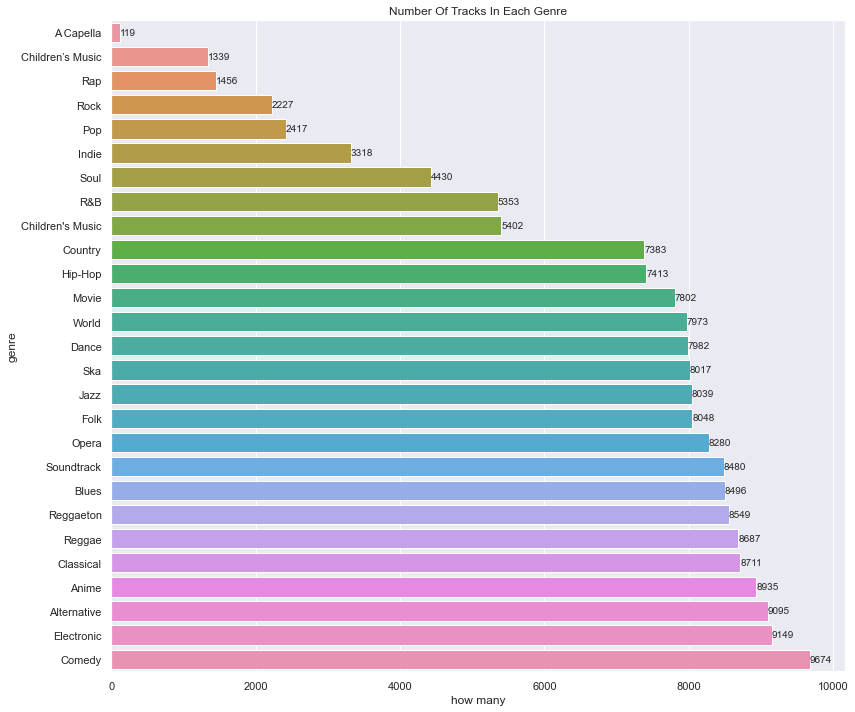

In [63]:
number_of_tracks_by_genre = pd.DataFrame(data=spotify_data.groupby('genre').size(),columns=['how many']).sort_values(
    by='how many')

plt.figure(figsize=(12,10))
ax = sns.barplot(x='how many',y=number_of_tracks_by_genre.index,data=number_of_tracks_by_genre)

for i in ax.containers:
    ax.bar_label(i,)

plt.title("Number Of Tracks In Each Genre")
plt.tight_layout()
plt.show()

###### Popularity of each genre

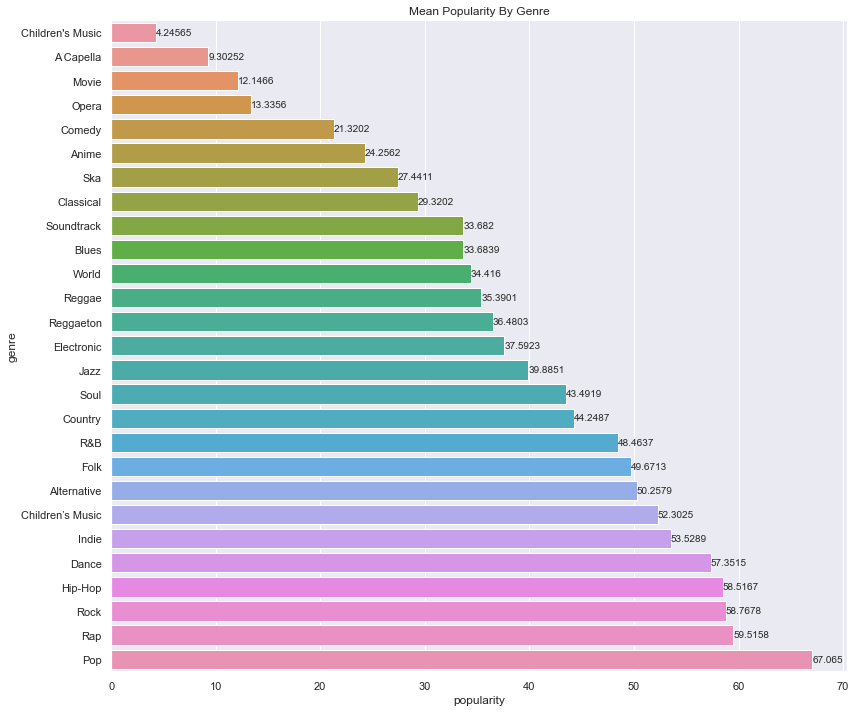

In [64]:
mean_popularity_by_genre = pd.DataFrame(data=spotify_data.groupby('genre')['popularity'].mean()).sort_values(
    by='popularity')

plt.figure(figsize=(12,10))
ax = sns.barplot(x='popularity',y=mean_popularity_by_genre.index,data=mean_popularity_by_genre)

for i in ax.containers:
    ax.bar_label(i,)

plt.title("Mean Popularity By Genre")
plt.tight_layout()
plt.show()

In [65]:
popularity_how_many_df = number_of_tracks_by_genre.join(mean_popularity_by_genre)
popularity_how_many_df

,how many,popularity
genre,,
A Capella,119,9.302521
Children’s Music,1339,52.302465
Rap,1456,59.515797
Rock,2227,58.767849
Pop,2417,67.064957
Indie,3318,53.528933
Soul,4430,43.491874
R&B,5353,48.463665
Children's Music,5402,4.245650


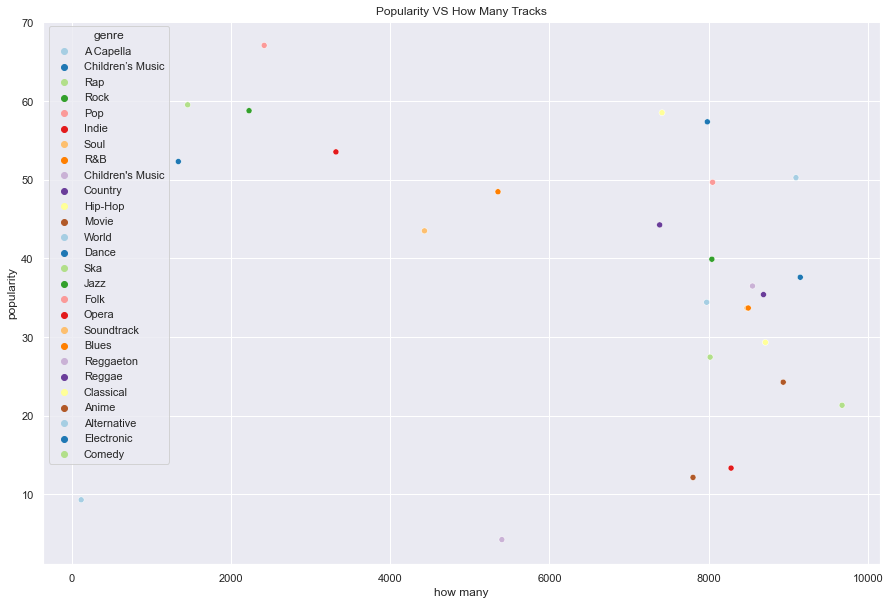

In [66]:
sns.set()

plt.figure(figsize=(15,10))
sns.scatterplot(x='how many', y='popularity',data=popularity_how_many_df, palette='Paired', hue='genre').set(
    title="Popularity VS How Many Tracks")

plt.show()

###### Most Popular Genre

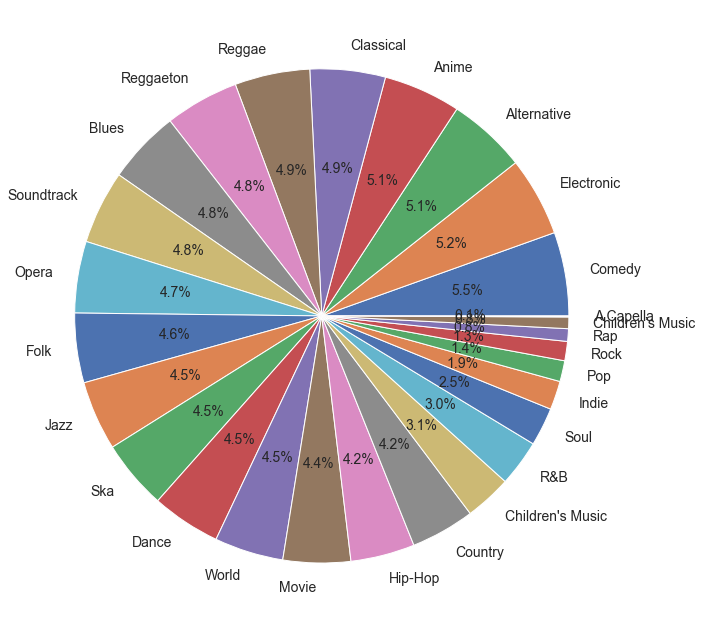

In [135]:
genres = spotify_data['genre'].value_counts()
labels = genres.index.values.tolist()
sizes = genres.values.tolist()

fig, ax = plt.subplots(figsize=(10,16))
plt.pie(x=sizes, labels=labels, autopct='%1.1f%%', textprops={'fontsize':14})

plt.tight_layout()
plt.show()

###### mean duration of each genre

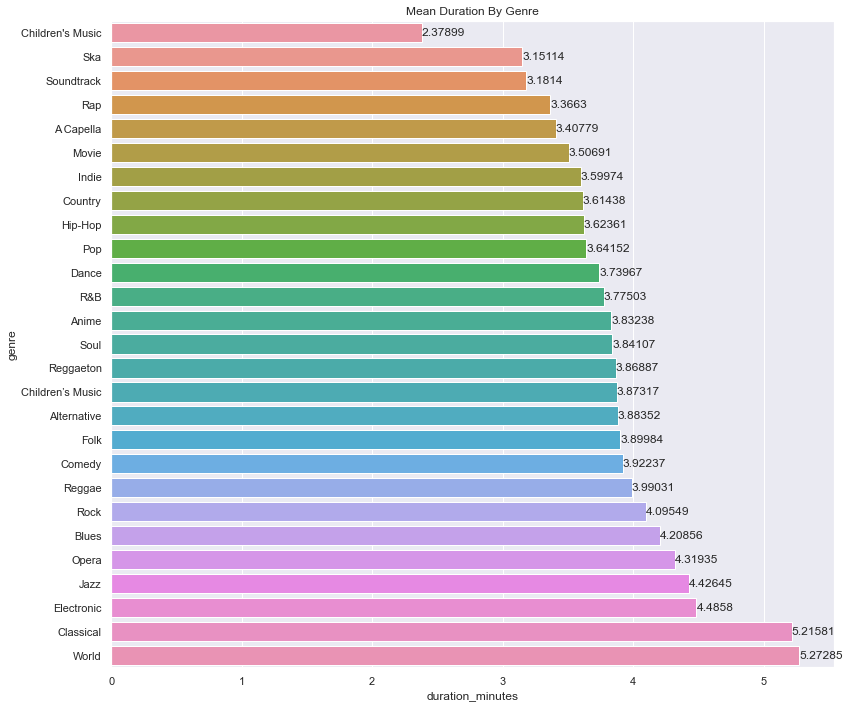

In [67]:
mean_duration_by_genre = pd.DataFrame(spotify_data.groupby('genre')['duration_minutes'].mean()).sort_values(
    by='duration_minutes')

plt.figure(figsize=(12,10))
ax = sns.barplot(x='duration_minutes',y=mean_duration_by_genre.index,data=mean_duration_by_genre)

for i in ax.containers:
    ax.bar_label(i,)

plt.title("Mean Duration By Genre")
plt.tight_layout()
plt.show()

###### duration vs popularity

In [68]:
popularity_duration_df = mean_popularity_by_genre.join(mean_duration_by_genre)
popularity_duration_df

,popularity,duration_minutes
genre,,
Children's Music,4.245650,2.378989
A Capella,9.302521,3.407795
Movie,12.146629,3.506913
Opera,13.335628,4.319352
Comedy,21.320240,3.922373
Anime,24.256184,3.832383
Ska,27.441063,3.151135
Classical,29.320170,5.215806
Soundtrack,33.681958,3.181399


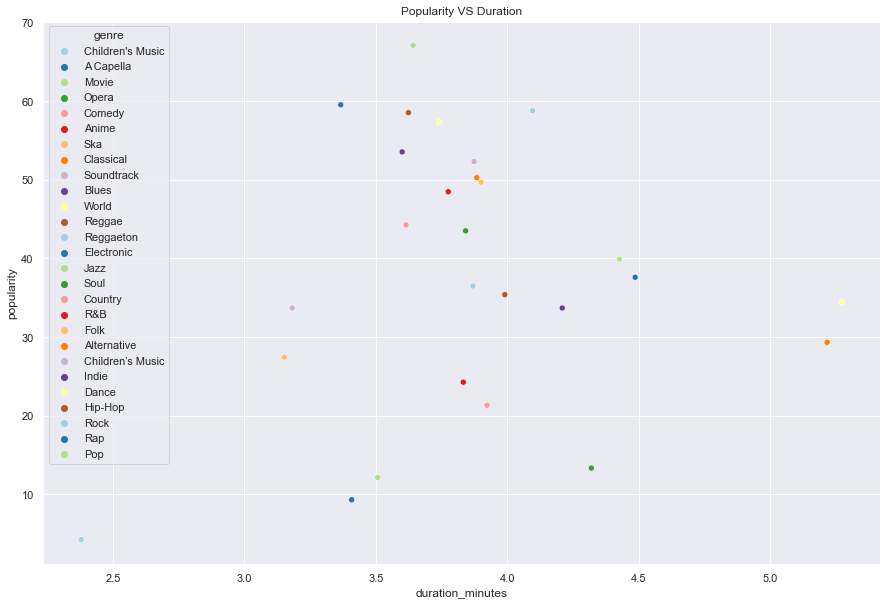

In [69]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='duration_minutes', y='popularity',data=popularity_duration_df, palette='Paired', hue='genre').set(
    title="Popularity VS Duration")

plt.show()

###### loudness vs energy correlation

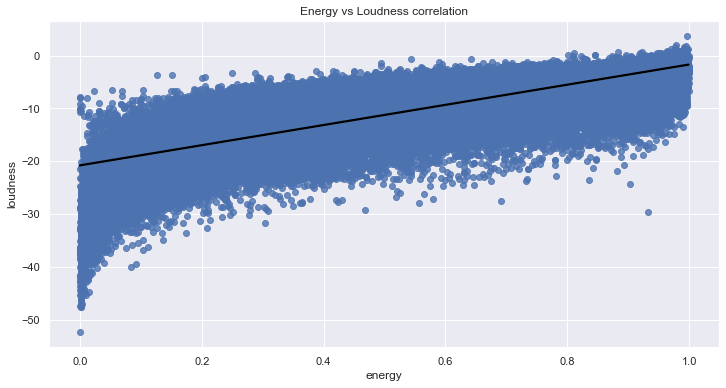

In [70]:
plt.figure(figsize=(12,6))
sns.regplot(x='energy', y='loudness', data=spotify_data,
           line_kws={"color": "black"}).set(title="Energy vs Loudness correlation")

plt.show()

# there is correlation- linear line

###### danceability vs energy correlation

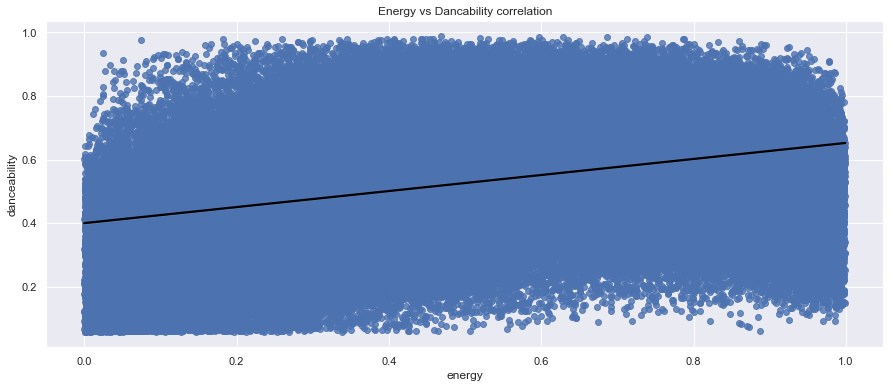

In [71]:
plt.figure(figsize=(15,6))
sns.regplot(x='energy', y='danceability', data=spotify_data,
           line_kws={"color": "black"}).set(title="Energy vs Dancability correlation")

plt.show()

# there is correlation- linear line
# wide distribution

###### danceility vs loudness correlation

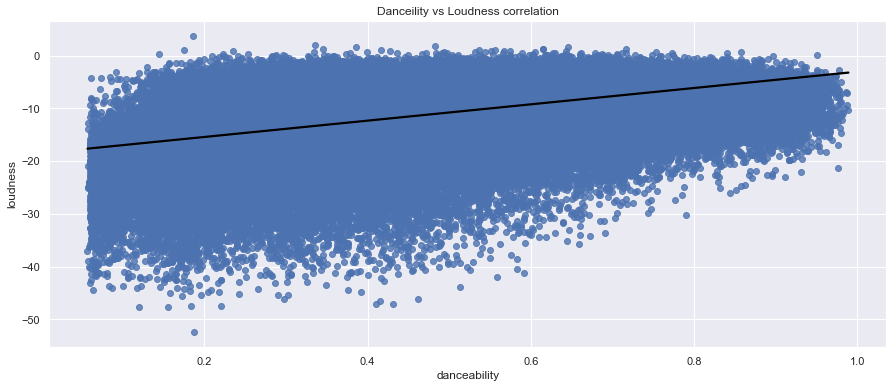

In [72]:
plt.figure(figsize=(15,6))
sns.regplot(x='danceability', y='loudness', data=spotify_data,
           line_kws={"color": "black"}).set(title="Danceility vs Loudness correlation")

plt.show()

###### popularity vs danceability

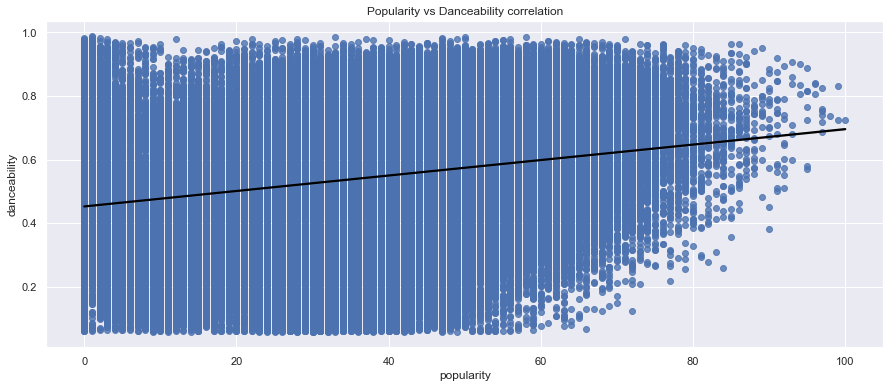

In [73]:
plt.figure(figsize=(15,6))
sns.regplot(x='popularity', y='danceability', data=spotify_data,
           line_kws={"color": "black"}).set(title="Popularity vs Danceability correlation")

plt.show()

# danceability does not indicate popularity

### Data Pre-Processing

###### My goal is to predict tracks popularity, In order to do that, I need to Build a column that much the labels I want to predict.

In [74]:
def calculate_popularity(row) -> int:
    """calculte and return popularity level:
        0 = low, 1 = medium, 2 = high"""
    if 0 <= row['popularity'] <= 40:
        return 0
    elif 40 < row['popularity'] <= 79:
        return 1
    else: 
        return 2

In [75]:
spotify_copy = spotify_data.copy()

In [76]:
spotify_copy['popularity_level'] = spotify_copy.apply(lambda row: calculate_popularity(row), axis=1)

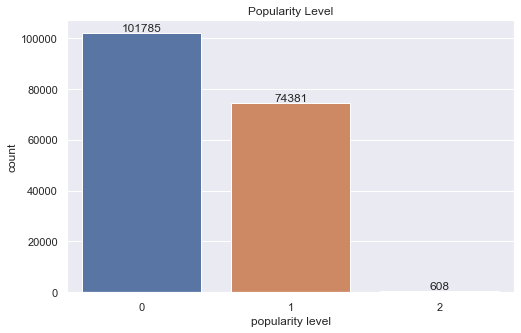

In [77]:
plt.figure(figsize=(8,5))

ax = sns.countplot(x='popularity_level',data=spotify_copy)

for i in ax.containers:
    ax.bar_label(i,)

plt.xlabel("popularity level")
plt.title("Popularity Level")

plt.show()

In [78]:
spotify_copy

,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,duration_minutes,popularity_level
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.6110,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814,1.656217,0
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.2460,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816,2.289550,0
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.9520,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368,2.837783,0
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.7030,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227,2.540450,0
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.9500,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390,1.377083,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232716,Soul,John Legend,Quickly (feat. Brandy),1U0OMWvR89Cm20vCNar50f,39,0.2310,0.736,222667,0.701,0.000000,A#,0.2030,-4.345,Minor,0.1000,99.991,4/4,0.770,3.711117,0
232717,Soul,Belly,P.O.P.,2gGqKJWfWbToha2YmDxnnj,43,0.1040,0.802,201173,0.516,0.000485,D,0.1050,-9.014,Major,0.2130,175.666,4/4,0.482,3.352883,1
232719,Soul,"Bobby ""Blue"" Bland",I'll Take Care Of You - Single Version,2iZf3EUedz9MPqbAvXdpdA,32,0.5660,0.423,144667,0.337,0.000000,A#,0.2760,-13.092,Minor,0.0436,80.023,4/4,0.497,2.411117,0
232721,Soul,Jr Thomas & The Volcanos,Burning Fire,1qWZdkBl4UVPj9lK6HuuFM,38,0.0329,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969,4.707450,0


In [79]:
spotify_copy['key'].nunique()

12

The dataset is imbalanced, I will take care of it later

###### Correlations

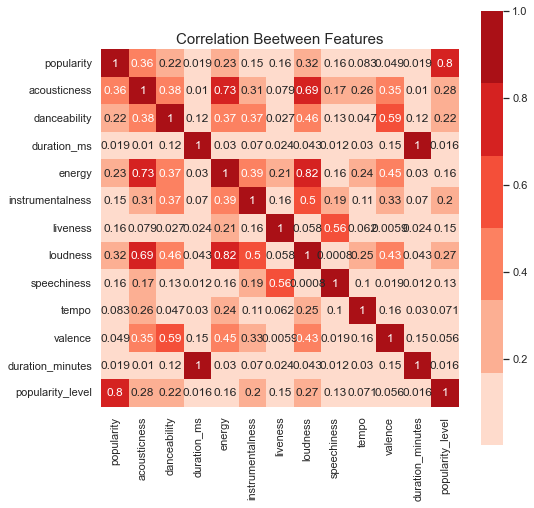

In [80]:
corr = np.abs(spotify_copy.corr()) # corr function ignores non-numeric features
plt.figure(figsize=(8,8))
cmap = sns.color_palette(palette="Reds")
sns.heatmap(data=corr, annot=True,cmap=cmap, square=True)
 
plt.title("Correlation Beetween Features", fontdict={'fontsize': 15})
plt.show()

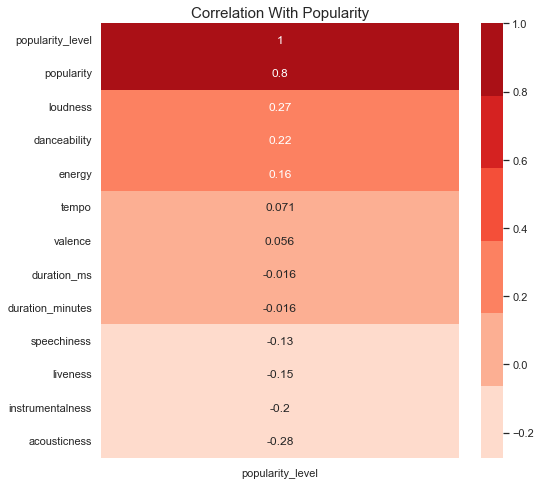

In [81]:
corr_with_popularity = spotify_copy.corr()[['popularity_level']].sort_values(by='popularity_level', ascending=False)
plt.figure(figsize=(8,8))
sns.heatmap(corr_with_popularity, annot=True, cmap=cmap)

plt.title("Correlation With Popularity", fontdict={'fontsize': 15})
plt.show()

###### Dropping All Objecte type features

Dropping 'duration_ms' as well because it's redunant for the reason I have the 'duration_minutes'.

How do I know to drop all the categorical features? Because usually, indetification featuers such as names and id does not have any effect on the popularity.
<br>In addition, I decide to drop the 'artist name' feature as well because it has more than  14000 different values.

In [82]:
object_featuers = spotify_copy.columns[spotify_copy.dtypes == 'object'].append(pd.Index(['duration_ms', 'popularity']))
object_featuers = object_featuers.delete(0)
object_featuers

Index(['artist_name', 'track_name', 'track_id', 'key', 'mode',
       'time_signature', 'duration_ms', 'popularity'],
      dtype='object')

In [83]:
spotify_numeric_only = spotify_copy.drop(labels=object_featuers, axis=1)
spotify_numeric_only.reset_index(inplace=True)
spotify_numeric_only.drop(columns='index',axis=1,inplace=True)
spotify_numeric_only

,genre,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_minutes,popularity_level
0,Movie,0.6110,0.389,0.910,0.000000,0.3460,-1.828,0.0525,166.969,0.814,1.656217,0
1,Movie,0.2460,0.590,0.737,0.000000,0.1510,-5.559,0.0868,174.003,0.816,2.289550,0
2,Movie,0.9520,0.663,0.131,0.000000,0.1030,-13.879,0.0362,99.488,0.368,2.837783,0
3,Movie,0.7030,0.240,0.326,0.000000,0.0985,-12.178,0.0395,171.758,0.227,2.540450,0
4,Movie,0.9500,0.331,0.225,0.123000,0.2020,-21.150,0.0456,140.576,0.390,1.377083,0
...,...,...,...,...,...,...,...,...,...,...,...,...
176769,Soul,0.2310,0.736,0.701,0.000000,0.2030,-4.345,0.1000,99.991,0.770,3.711117,0
176770,Soul,0.1040,0.802,0.516,0.000485,0.1050,-9.014,0.2130,175.666,0.482,3.352883,1
176771,Soul,0.5660,0.423,0.337,0.000000,0.2760,-13.092,0.0436,80.023,0.497,2.411117,0
176772,Soul,0.0329,0.785,0.683,0.000880,0.2370,-6.944,0.0337,113.830,0.969,4.707450,0


###### One Hot Encoding Genre Feature
I will use One Hot Encoding, because the genre feature is nominal and I do not want the models to capture the relationships between genres in alphabetical order. 

In [84]:
one_hot_encoder = OneHotEncoder()

genres_encoding = one_hot_encoder.fit_transform(spotify_numeric_only['genre'].values.reshape(-1,1)).toarray()

df_encoding = pd.DataFrame(data=genres_encoding)
df_encoding = df_encoding.apply(lambda row: row.astype(int), axis=1)

final_spotify_df = spotify_numeric_only.join(df_encoding)
# shuffling the dataset
final_spotify_df = final_spotify_df.sample(frac=1, random_state=42).reset_index()
# dropping the column which added automatically when suffling
final_spotify_df.drop(columns=['index','genre'],axis=1,inplace=True)

final_spotify_df

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,duration_minutes,...,17,18,19,20,21,22,23,24,25,26
0,0.5140,0.666,0.145,0.000000,0.6740,-21.257,0.9280,101.145,0.256,3.433117,...,0,0,0,0,0,0,0,0,0,0
1,0.5380,0.629,0.417,0.000609,0.0888,-14.958,0.0306,138.922,0.488,5.986667,...,0,0,0,0,0,0,0,1,0,0
2,0.2240,0.782,0.724,0.052600,0.0858,-6.372,0.0439,126.058,0.581,4.663783,...,0,0,0,0,0,0,0,0,0,0
3,0.1770,0.703,0.714,0.000000,0.0860,-4.613,0.0780,169.917,0.820,3.576467,...,0,0,0,0,1,0,0,0,0,0
4,0.7600,0.653,0.638,0.000000,0.8660,-14.296,0.9600,66.080,0.233,5.033550,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176769,0.0460,0.675,0.837,0.000173,0.2120,-3.243,0.0936,171.964,0.940,4.138217,...,0,0,0,0,1,0,0,0,0,0
176770,0.0808,0.602,0.871,0.000035,0.0629,-5.680,0.0652,79.964,0.752,3.650000,...,0,0,0,1,0,0,0,0,0,0
176771,0.7020,0.467,0.837,0.000000,0.8720,-17.007,0.9120,81.681,0.228,1.844000,...,0,0,0,0,0,0,0,0,0,0
176772,0.3280,0.631,0.770,0.000000,0.1180,-7.646,0.3600,83.956,0.376,3.856883,...,0,0,0,0,0,0,1,0,0,0


###### Over Sampling

As we saw above, the data set is imbalanced. I will use SMOTE to rebalance it.

###### Data split

In [88]:
X_init = final_spotify_df.drop(['popularity_level'], axis=1)
y_init = final_spotify_df['popularity_level']
print("X shape: {}\ny shape: {}\n".format(X_init.shape,y_init.shape))

scaler = StandardScaler()
X_init = scaler.fit_transform(X_init)

sm = SMOTE(random_state=42)
X, y = sm.fit_resample(X_init, y_init)
print("Shape is: {}".format(Counter(y)))

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("x_train shape: {}\nx_test shape: {}\ny_train shape: {}\nt_test shape: {}".
      format(x_train.shape, x_test.shape, y_train.shape, y_test.shape))

X shape: (176774, 37)
y shape: (176774,)

Shape is: Counter({0: 101785, 1: 101785, 2: 101785})
x_train shape: (244284, 37)
x_test shape: (61071, 37)
y_train shape: (244284,)
t_test shape: (61071,)


### Modeling

In [151]:
def classification_process(classifier):
    classifier.fit(x_train, y_train)
    predictions = classifier.predict(x_test)
    print(classification_report(y_true=y_test, y_pred=predictions, zero_division=1)) # classification report
    
    # confusion matrix
    cm = confusion_matrix(y_true=y_test,y_pred=predictions)
    lables = ["0","1","2"]
    
    fig = plt.figure(figsize=(10,6))
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
    
    ax.set_xlabel('Predicted', fontsize=20)
    ax.xaxis.set_label_position('bottom')
    plt.xticks(rotation=90)
    ax.xaxis.set_ticklabels(lables, fontsize = 10)
    ax.xaxis.tick_bottom()

    ax.set_ylabel('True', fontsize=20)
    ax.yaxis.set_ticklabels(lables, fontsize = 10)
    plt.yticks(rotation=0)
    plt.title('Confusion Matrix', fontsize=20)
    
    plt.show()

              precision    recall  f1-score   support

           0       0.33      1.00      0.50     20292
           1       1.00      0.00      0.00     20400
           2       1.00      0.00      0.00     20379

    accuracy                           0.33     61071
   macro avg       0.78      0.33      0.17     61071
weighted avg       0.78      0.33      0.17     61071



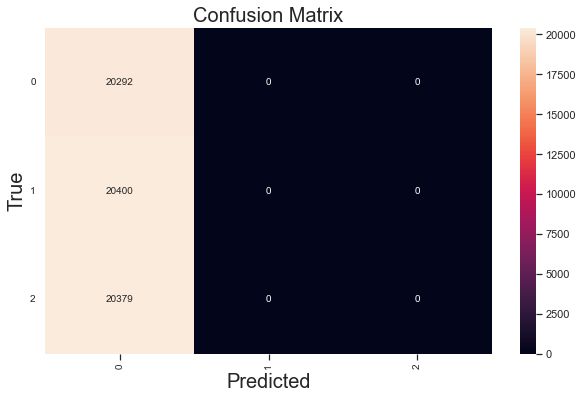

In [152]:
# dummy classifier

dummy_classi = DummyClassifier()
classification_process(dummy_classi)

###### KNN

              precision    recall  f1-score   support

           0       0.84      0.82      0.83     20292
           1       0.82      0.79      0.80     20400
           2       0.94      1.00      0.97     20379

    accuracy                           0.87     61071
   macro avg       0.87      0.87      0.87     61071
weighted avg       0.87      0.87      0.87     61071



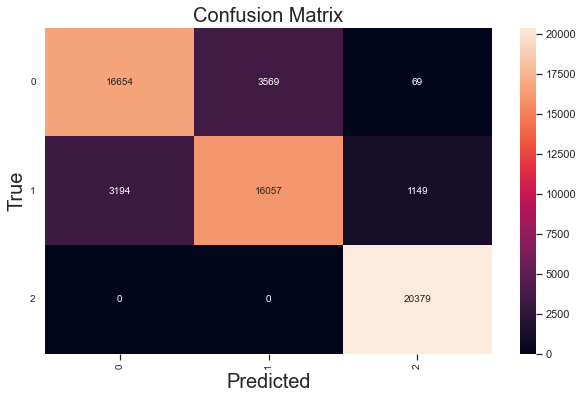

In [153]:
knn_classifier = KNeighborsClassifier()
classification_process(knn_classifier)

###### Random Forest Classifier

              precision    recall  f1-score   support

           0       0.83      0.90      0.86     20292
           1       0.89      0.80      0.85     20400
           2       0.99      1.00      0.99     20379

    accuracy                           0.90     61071
   macro avg       0.90      0.90      0.90     61071
weighted avg       0.90      0.90      0.90     61071



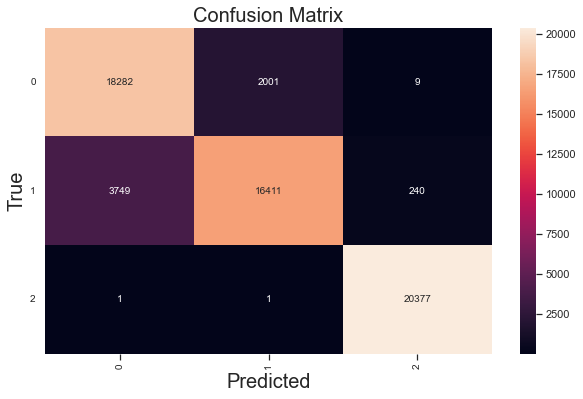

In [154]:
rnd_classifier = RandomForestClassifier()
classification_process(rnd_classifier)

###### Logistic Regression

              precision    recall  f1-score   support

           0       0.79      0.89      0.84     20292
           1       0.76      0.53      0.62     20400
           2       0.78      0.92      0.84     20379

    accuracy                           0.78     61071
   macro avg       0.78      0.78      0.77     61071
weighted avg       0.78      0.78      0.77     61071



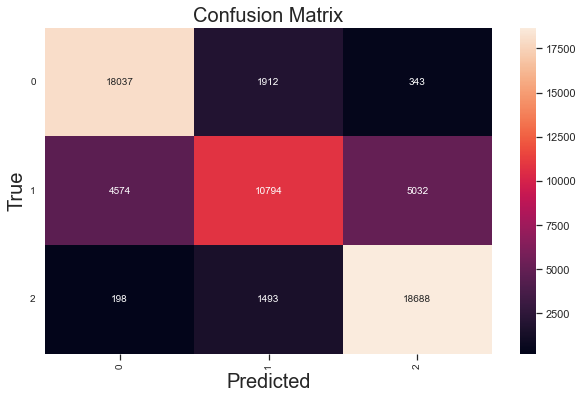

In [155]:
log_reg_classi = LogisticRegression(multi_class='multinomial',max_iter=300)
classification_process(log_reg_classi)

###### Decision Tree

In [ ]:
tree_classi = DecisionTreeClassifier()
classification_process(tree_classi)